# Importing Modules

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import math
import plotly.graph_objects as go
import plotly.express as px

## Miscellaneous

In [66]:
plt.rcParams["figure.figsize"] = (16,9) # Ashas tip! This makes plots bigger!!!!
sns.set_style("ticks")
sns.set_theme(style="white", palette='Paired')

# Lab Round 2

## Importing data <a class="anchor" id="importing"></a>

In [67]:
# Importing the Health Care for All Dataset
def get_data():
    file = input('Please, insert your csv/txt file name: ')
    df = pd.read_csv(file)
    print('This are the first 5 rows of your data: \n')
    display(df.head())
    return df

In [68]:
hfa = get_data()

Please, insert your csv/txt file name: marketing_customer_analysis.csv
This are the first 5 rows of your data: 



,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


## Show the dataframe shape.

In [69]:
hfa.shape

(10910, 26)

## Standardize header names.

In [70]:
hfa.columns = hfa.columns.str.replace('[#,@,&,%,?,!,-,:]', '')
hfa.columns = hfa.columns.str.replace(' ', '_')
hfa.columns = hfa.columns.str.lower()

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/3583045367.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [71]:
hfa

,unnamed_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


## Columns types

In [72]:
hfa.dtypes

unnamed_0                          int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

### Which columns are numerical?

In [73]:
numerical_columns = hfa.select_dtypes(np.number)
numerical_columns.head()

,unnamed_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


### Which columns are categorical?

In [74]:
categorical_columns = hfa.select_dtypes(object)
categorical_columns.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


## Check and deal with NaN values.

### Search for NaN values

In [75]:
hfa.isna().sum()

unnamed_0                           0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

### The same, but as a percentage

In [76]:
hfa.isnull().mean().round(2) * 100

unnamed_0                         0.0
customer                          0.0
state                             6.0
customer_lifetime_value           0.0
response                          6.0
coverage                          0.0
education                         0.0
effective_to_date                 0.0
employmentstatus                  0.0
gender                            0.0
income                            0.0
location_code                     0.0
marital_status                    0.0
monthly_premium_auto              0.0
months_since_last_claim           6.0
months_since_policy_inception     0.0
number_of_open_complaints         6.0
number_of_policies                0.0
policy_type                       0.0
policy                            0.0
renew_offer_type                  0.0
sales_channel                     0.0
total_claim_amount                0.0
vehicle_class                     6.0
vehicle_size                      6.0
vehicle_type                     50.0
dtype: float

### Dealing with NaN's

#### We find that we miss almost 6% of data in six different columns (excluding the 'vehicle_type').
#### This could represent, all together, 36% of data.
#### But, since the 'state' & 'response' columns share the same number of NaN's, I guess that those are related.
#### Let's see:

In [77]:
state_response_nan = hfa.filter(['state', 'response'])
state_response_nan = state_response_nan.dropna(subset=['state']) # We are dropping only the Nan's from the 'state' column
state_response_nan.isna().sum()

state       0
response    0
dtype: int64

#### We can see that when we drop the NaN's from state, the NaN's from response also disapear.
#### So, until now, we are losing 6% of our data.
#### Now let's check the same for the 'months_since_last_claim' and 'number_of_open_complaints'.

In [78]:
mslc_nooc_nan = hfa.filter(['months_since_last_claim', 'number_of_open_complaints'])
mslc_nooc_nan = mslc_nooc_nan.dropna(subset=['months_since_last_claim']) # We are dropping only the Nan's from the 'state' column
mslc_nooc_nan.isna().sum()

months_since_last_claim      0
number_of_open_complaints    0
dtype: int64

#### And, again, for 'vehicle_class' and 'vehicle_size'...

In [79]:
class_size_nan = hfa.filter(['vehicle_class', 'vehicle_size'])
class_size_nan = class_size_nan.dropna(subset=['vehicle_class']) # We are dropping only the Nan's from the 'state' column
class_size_nan.isna().sum()

vehicle_class    0
vehicle_size     0
dtype: int64

#### All the NaN's disapeared when we droped one of the those pairs of columns.
#### So, I guess we could drop all these NaN's and lose, not 36%, but 18%.
#### But, I should keep in mind that these errors are, together, almost one fifth of my data. So, as the values for the columns months_since_last_claim' and 'number_of_open_complaints are numerical, I prefer to save these 6% and replace the NaN's with the mean value of those columns.
#### This way we are only droping 12% of our data. I feel happier when I save 6% of data. :) :) :)
#### So lets do it:

In [80]:
hfa['months_since_last_claim'] = hfa['months_since_last_claim'].fillna(hfa['months_since_last_claim'].mean())
hfa['number_of_open_complaints'] = hfa['number_of_open_complaints'].fillna(hfa['number_of_open_complaints'].mean())
hfa = hfa.dropna(subset=['state', 'vehicle_class'])

#### Now we have to deal with those 50% of NaN's that we have in vehicle_type.
#### Since my dear colegue, Holly, found out that this is a variable that speciffies the type of transmission of the car, I'll replace all the NaN's for M's, since all the other values for that variable are A's.

In [81]:
hfa['vehicle_type'] = hfa.vehicle_type.fillna('M')

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/3539363330.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Now let's search for those errors again.

In [82]:
hfa.isna().sum()

unnamed_0                        0
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

#### Nice!!!!!
#### Let's have a look to our dataframe again and see if we can do anything else:

In [83]:
hfa

,unnamed_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,0.000000,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M


#### We can see that the column 'unnamed_0' don't add up nothing to our dataframe, it is just an older index...so, we will drop it.

In [84]:
hfa.drop('unnamed_0', axis = 1, inplace = True)

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/3546067022.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Date transformation

In [85]:
hfa['effective_to_date']=pd.to_datetime(hfa['effective_to_date']) # This changes the date to a datetime dtype
hfa['month'] = hfa['effective_to_date'].dt.month # This extracts only the month from the data and assigns it to a new column
hfa['month'] = hfa.month.loc[hfa['month'].isin([1,2,3])] # This filters the data to show only the information for the first quarter

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/1083420797.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/1083420797.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/1083420797.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

#### We haven't changed our dataframe with this filter since there's only data from month 1 and month 2.

## BONUS!

In [86]:
def round_2():
    file = input('Please, insert your csv/txt file name: ')
    data = pd.read_csv(file)
    print(data.shape)
    data.columns = data.columns.str.replace('[#,@,&,%,?,!,-,:]', '')
    data.columns = data.columns.str.replace(' ', '_')
    data.columns = data.columns.str.lower()
    data['months_since_last_claim'] = data['months_since_last_claim'].fillna(data['months_since_last_claim'].mean())
    data['number_of_open_complaints'] = data['number_of_open_complaints'].fillna(data['number_of_open_complaints'].mean())
    data = data.dropna(subset=['state', 'vehicle_class'])
    data['vehicle_type'] = data.vehicle_type.fillna('M')
    data.drop('unnamed_0', axis = 1, inplace = True)
    data['effective_to_date']=pd.to_datetime(data['effective_to_date'])
    data['month'] = data['effective_to_date'].dt.month 
    data['month'] = data.month.loc[data['month'].isin([1,2,3])]
    return data

In [87]:
hfa_t = round_2()

Please, insert your csv/txt file name: marketing_customer_analysis.csv
(10910, 26)


/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/3425459292.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [88]:
hfa_t

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2


# Lab Round 3

## Importing data

In [89]:
hfa_cleaned = get_data()

Please, insert your csv/txt file name: marketing_customer_analysis_2.csv
This are the first 5 rows of your data: 



,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### I will use the data that I've been working since Lab Round 2. It has more 500 rows of data and more colums as well.
### In the end I want to compare models between this dataframe and the one sugested.
## Show DataFrame info.

In [90]:
hfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9688 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9688 non-null   object        
 1   state                          9688 non-null   object        
 2   customer_lifetime_value        9688 non-null   float64       
 3   response                       9688 non-null   object        
 4   coverage                       9688 non-null   object        
 5   education                      9688 non-null   object        
 6   effective_to_date              9688 non-null   datetime64[ns]
 7   employmentstatus               9688 non-null   object        
 8   gender                         9688 non-null   object        
 9   income                         9688 non-null   int64         
 10  location_code                  9688 non-null   object        
 11  marital_status  

## Describe DataFrame.

In [91]:
hfa.describe(include='all').T

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/3700635200.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
customer,9688,9134,OJ33945,3,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,9688,5,California,3344,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_lifetime_value,9688.0,NaN,NaN,NaN,NaT,NaT,7996.180571,6832.516819,1898.007675,4013.921611,5786.49398,8984.682679,83325.38119
response,9688,2,No,8308,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,9688,3,Basic,5915,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,9688,5,Bachelor,2917,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective_to_date,9688,59,2011-01-10 00:00:00,207,2011-01-01,2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,9688,5,Employed,6034,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,9688,2,F,4927,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,9688.0,NaN,NaN,NaN,NaT,NaT,37551.325764,30357.895578,0.0,0.0,33802.5,62259.0,99981.0


## Show a plot of the total number of responses.

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



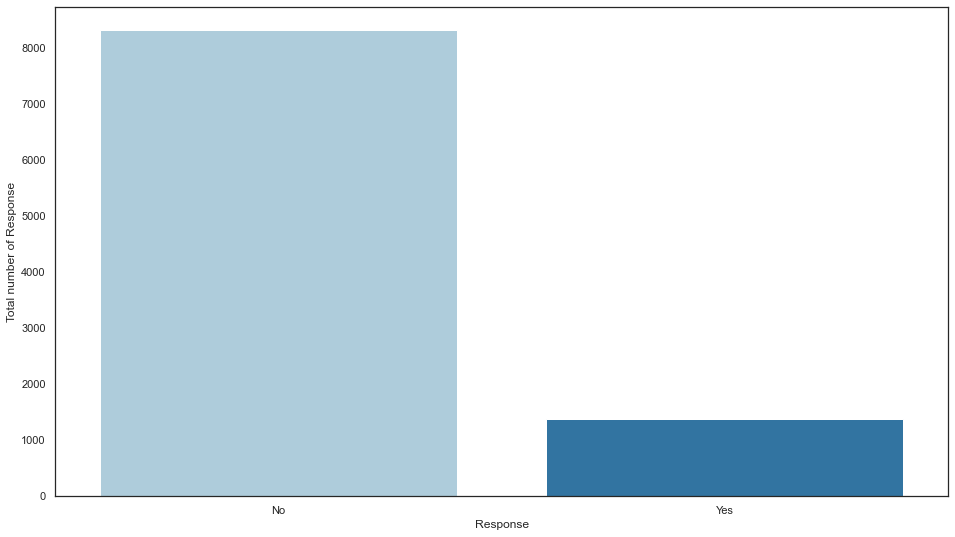

In [92]:
sns.countplot('response', data=hfa)
plt.ylabel('Total number of Response')
plt.xlabel('Response')
plt.show()

## Show a plot of the response rate by the sales channel.
### After a lot of time searching for the ideal way to present this info, I decided that I should move on.
### I really wanted a plot that showed both responses. I think it would be great to see it graphically.
### I managed to do this one, but, to be honest, the percentages don't add up, something goes wrong and, for now, I can't figure it out. If it was right, all the columns should reach 1:
#### (no responses + yes responses) for a specific sales channel should equal 1, meaning 100% for that sales channel.
### So, this is wrong... :(

In [93]:
hfa['response_rate_y'] = np.where(hfa.response=='Yes',1,0)
hfa['response_rate_n'] = np.where(hfa.response=='No',1,0)  # Erin's tip

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/1893903218.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/1893903218.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/3674323410.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



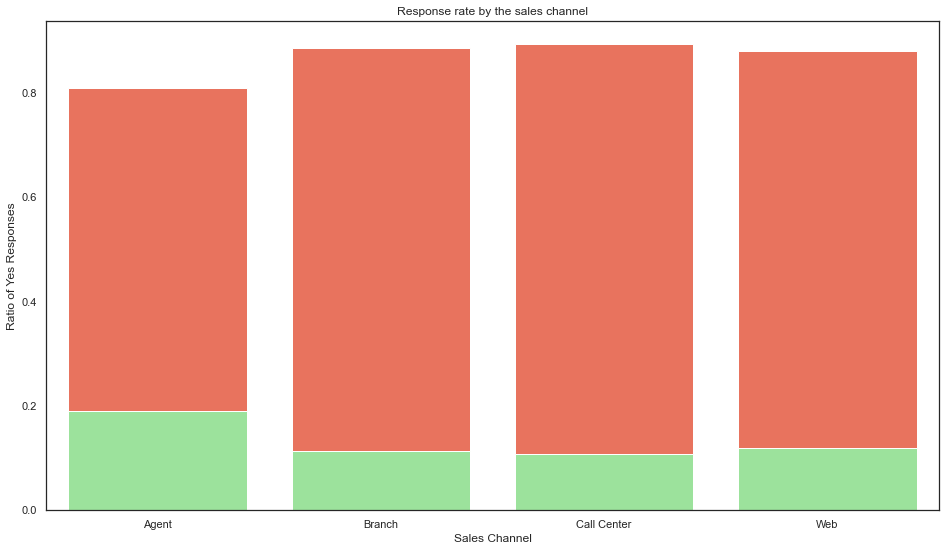

In [94]:
total_wrong = hfa.groupby('sales_channel')['response_rate_y', 'response_rate_n'].mean().reset_index()
rr_n_vs_sc = sns.barplot(x="sales_channel", y="response_rate_n", data=total_wrong, ci=None,  color='tomato').set_title('Response rate by the sales channel')
rr_y_vs_sc = sns.barplot(x="sales_channel", y="response_rate_y", data=total_wrong, ci=None,  color='lightgreen')
top_bar = mpatches.Patch(color='tomato', label='Response = No')
bottom_bar = mpatches.Patch(color='lightgreen', label='Response = Yes')
plt.ylabel('Ratio of Yes Responses')
plt.xlabel('Sales Channel')
plt.show()

#### This is just another test...it's not working properly.

In [95]:
df_yes = hfa[hfa['response'] == 'Yes']
df_no = hfa[hfa['response'] == 'No']
df_no

fig = go.Figure(data = [go.Bar(x = hfa['sales_channel'], y = df_yes['response_rate_y'], marker_color = 'indianred',name = 'Yes'),
                go.Bar(x = hfa['sales_channel'], y = hfa['response_rate_y'], marker_color = 'blue',name = 'No')
                ])


## Setting the titles, xaxis and yaxis  
fig.update_layout(title='Response rate by sales channel',
                   xaxis_title='Response',
                   yaxis_title='Sales Channel')
fig.update_layout(yaxis_tickformat = '%')
fig

### This is the plot with the right (but incomplete) answer! 

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/2655875730.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



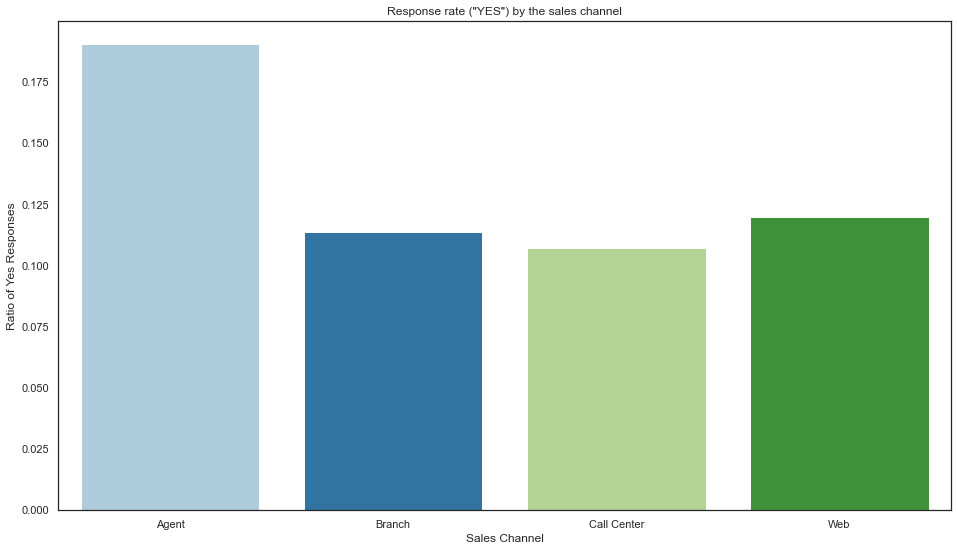

In [96]:
total = hfa.groupby('sales_channel')['response_rate_y', 'response_rate_n'].mean().reset_index()
rr_n_vs_sc = sns.barplot(x="sales_channel", y="response_rate_y", data=total, ci=None).set_title('Response rate ("YES") by the sales channel')
plt.ylabel('Ratio of Yes Responses')
plt.xlabel('Sales Channel')
plt.show()

### This is the other part of the answer xD

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/2360578781.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



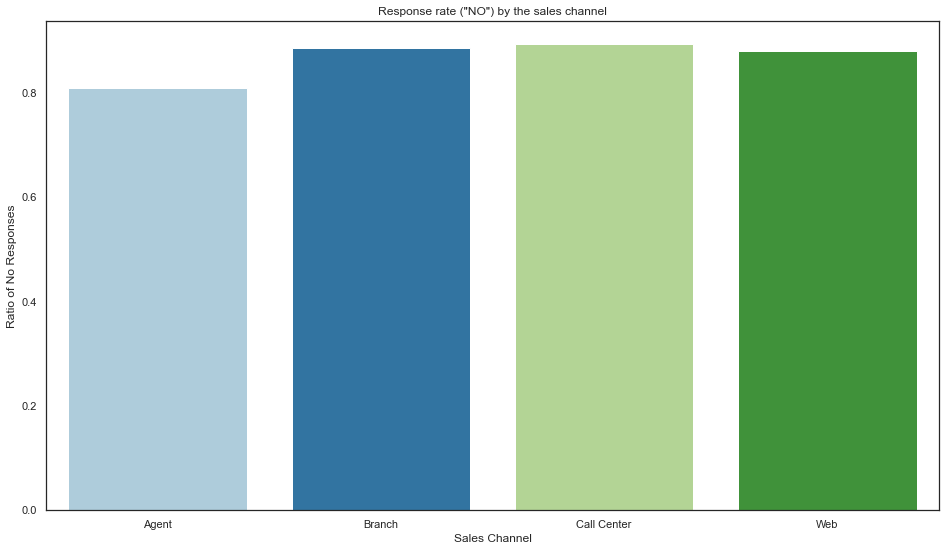

In [97]:
total = hfa.groupby('sales_channel')['response_rate_y', 'response_rate_n'].mean().reset_index()
rr_n_vs_sc = sns.barplot(x="sales_channel", y="response_rate_n", data=total, ci=None).set_title('Response rate ("NO") by the sales channel')
plt.ylabel('Ratio of No Responses')
plt.xlabel('Sales Channel')
plt.show()

## Show a plot of the response rate by the total claim amount.

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/2777382644.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'Total Claim Amount')

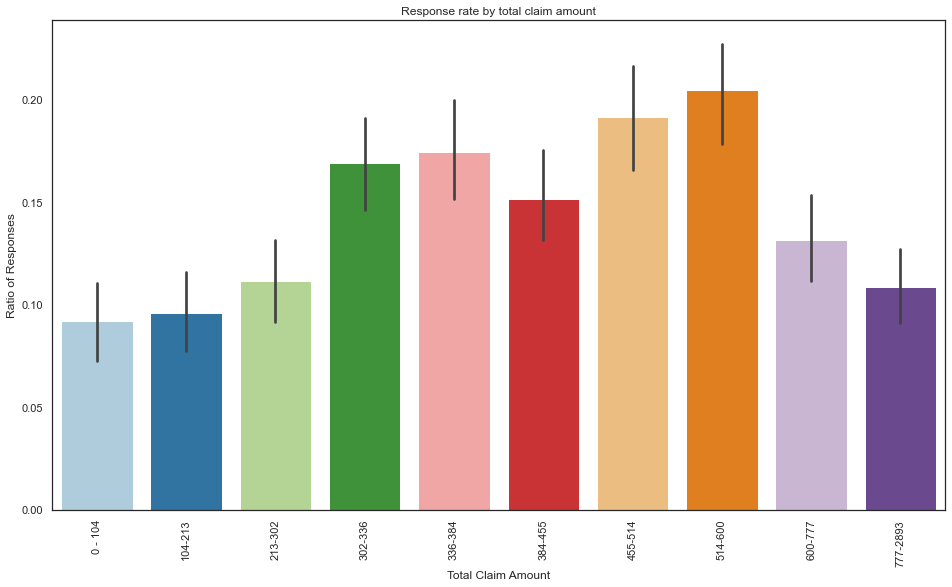

In [98]:
t_c_a_bins = pd.qcut(hfa['total_claim_amount'], q=10, precision = 1) #https://pandas.pydata.org/docs/reference/api/pandas.cut.html
hfa['t_c_a_bins'] = t_c_a_bins
fig, ax = plt.subplots()
sns.barplot(x= 't_c_a_bins',y='response_rate_y',data=hfa).set_title('Response rate by total claim amount')
labels=['0 - 104','104-213','213-302','302-336', '336-384', '384-455', '455-514', '514-600','600-777','777-2893']
ax.set_xticklabels(x='Total Claim Amount',labels=labels,rotation='vertical')
plt.ylabel('Ratio of Responses')
plt.xlabel('Total Claim Amount')

In [99]:
hfa.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,response_rate_y,response_rate_n,t_c_a_bins
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2,0,1,"(213.0, 302.4]"
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1,0,1,"(600.0, 777.8]"
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0,1,"(455.2, 514.5]"
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,1,0,"(455.2, 514.5]"
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1,0,1,"(600.0, 777.8]"


## Show a plot of the response rate by income.

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/1938920407.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'Income')

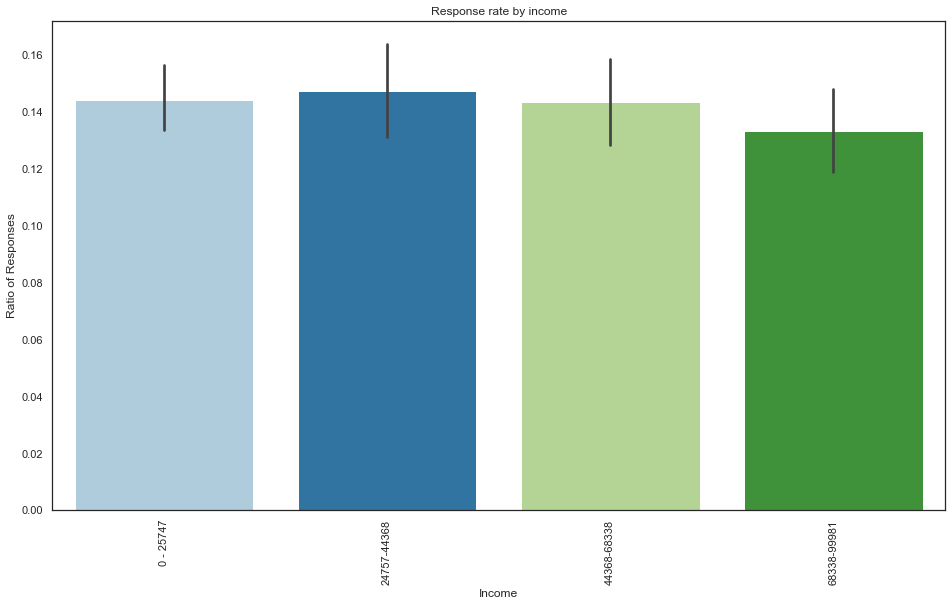

In [100]:
i_bins = pd.qcut(hfa['income'], q=5, duplicates = 'drop', precision = 1) #https://pandas.pydata.org/docs/reference/api/pandas.cut.html
hfa['i_bins'] = i_bins
fig, ax = plt.subplots()
sns.barplot(x= 'i_bins',y='response_rate_y',data=hfa).set_title('Response rate by income')
labels=['0 - 25747','24757-44368','44368-68338','68338-99981']
ax.set_xticklabels(x='Income',labels=labels,rotation='vertical')
plt.ylabel('Ratio of Responses')
plt.xlabel('Income')


# Lab Round 4

## Check the data types of the columns.

In [101]:
hfa.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

## Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.

In [102]:
categorical = hfa.select_dtypes(object)
numerical = hfa.select_dtypes(np.number)

## Now we will try to check the normality of the numerical variables visually

### Use seaborn library to construct distribution plots for the numerical variables

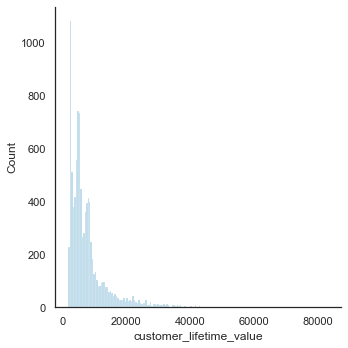

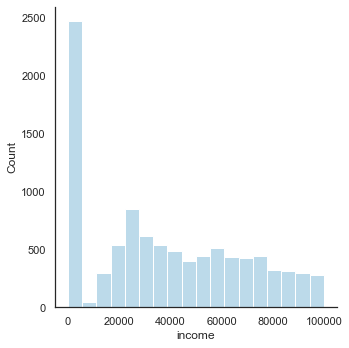

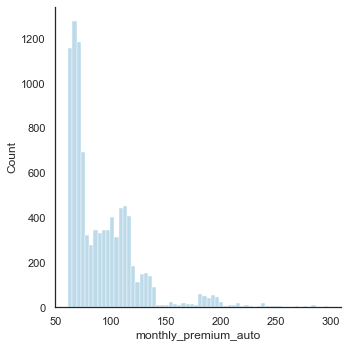

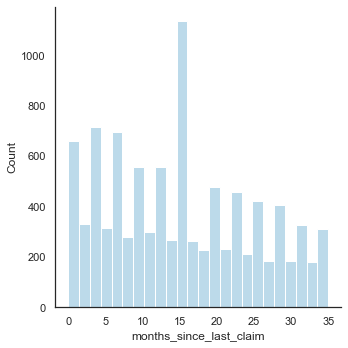

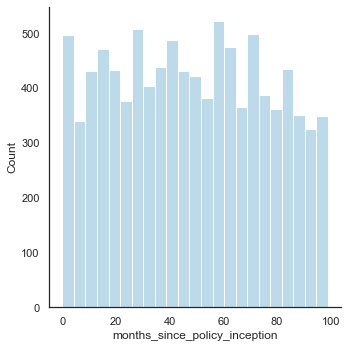

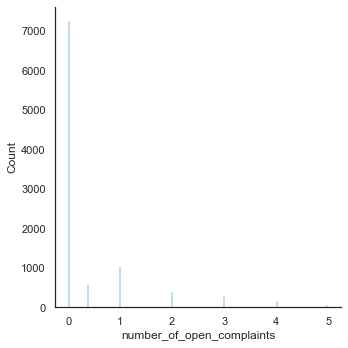

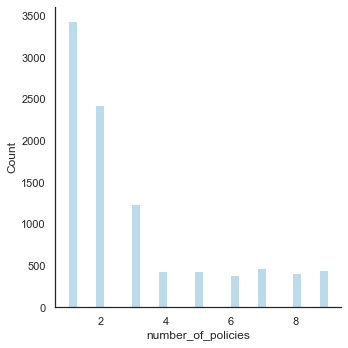

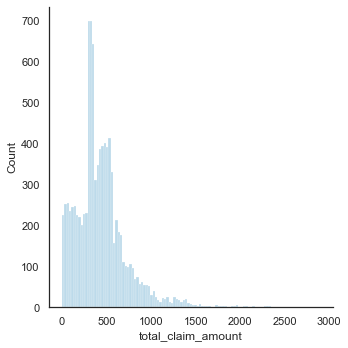

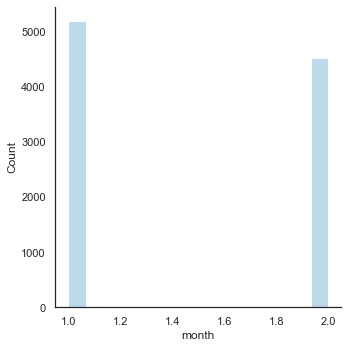

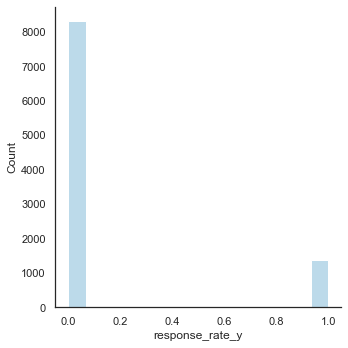

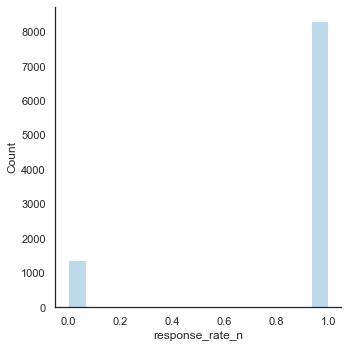

In [103]:
for variable in numerical:
    sns.displot(numerical, x= variable)

### Use Matplotlib to construct histograms

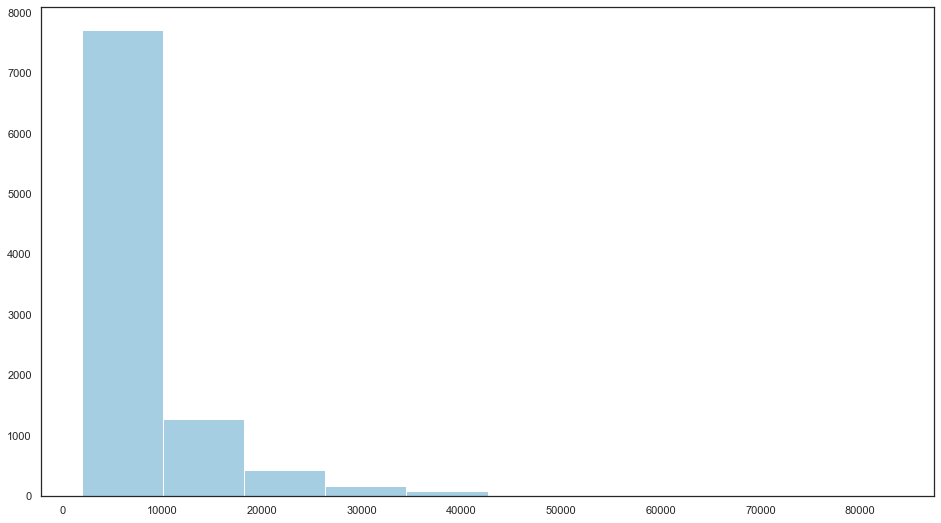

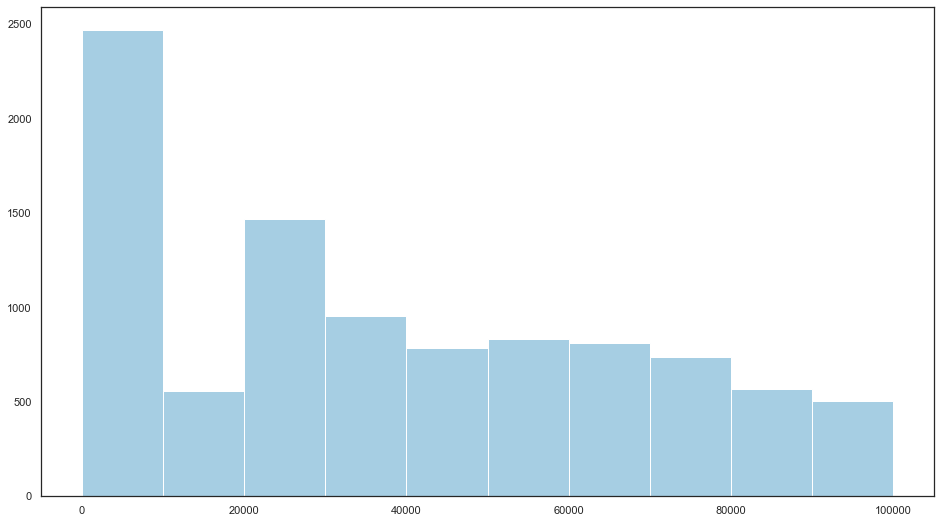

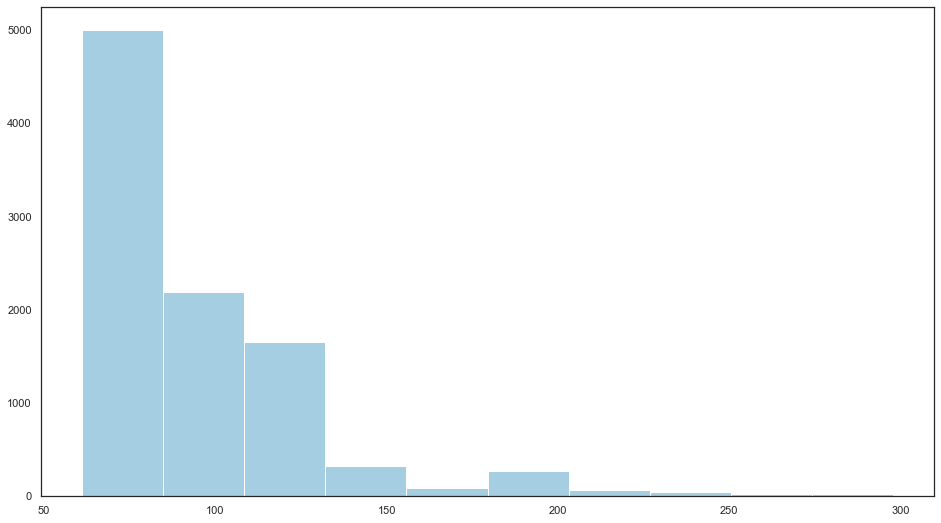

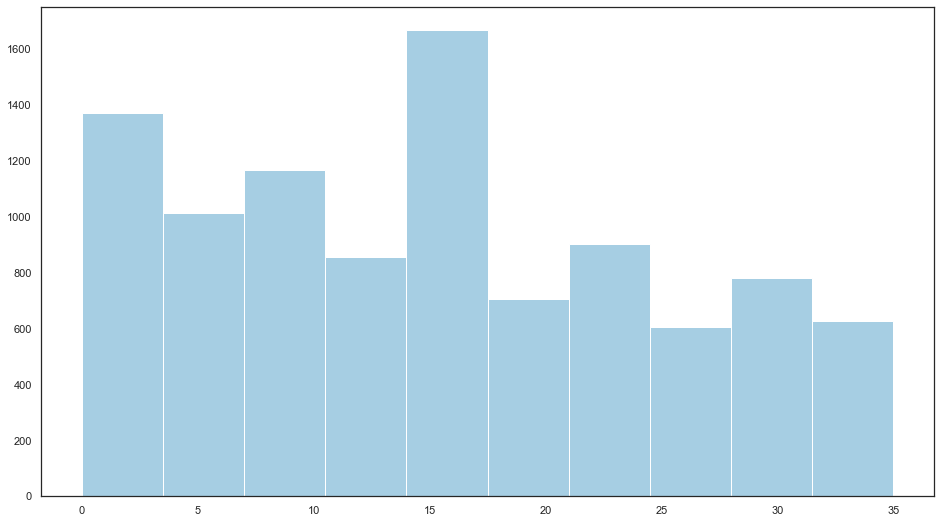

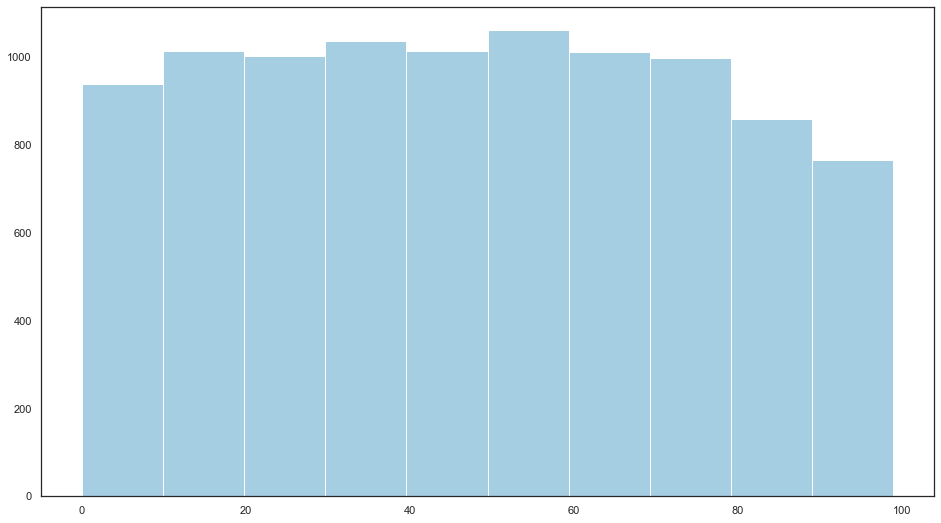

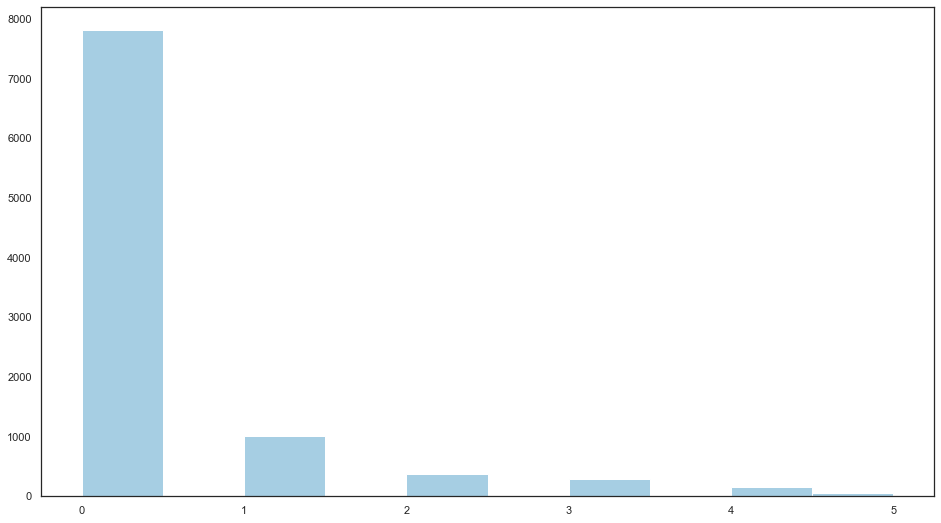

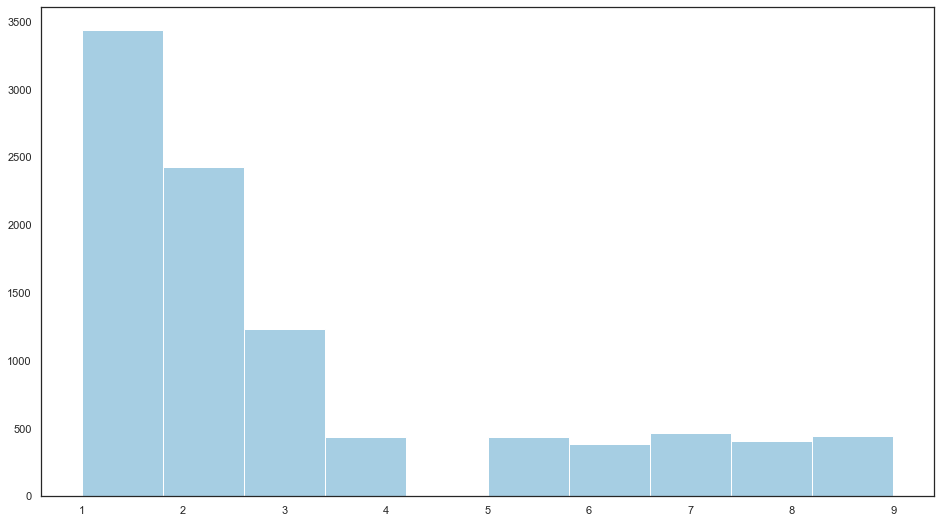

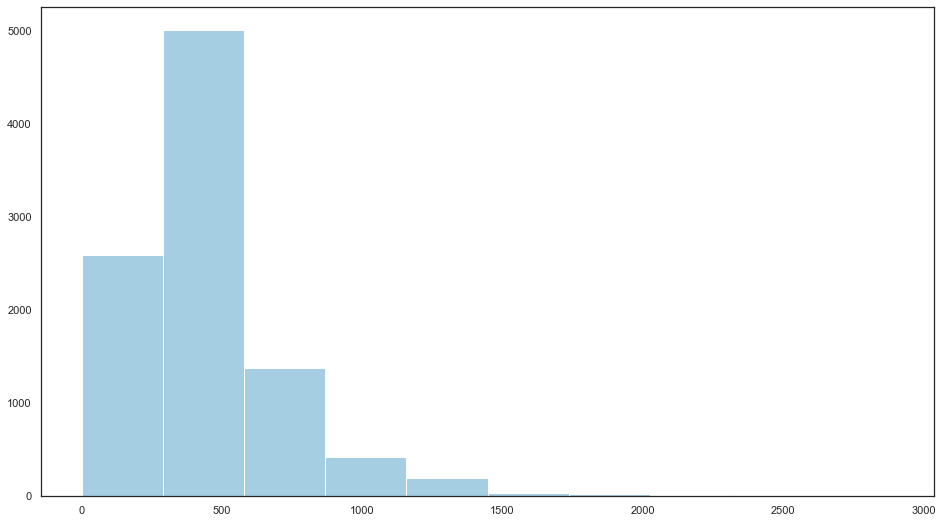

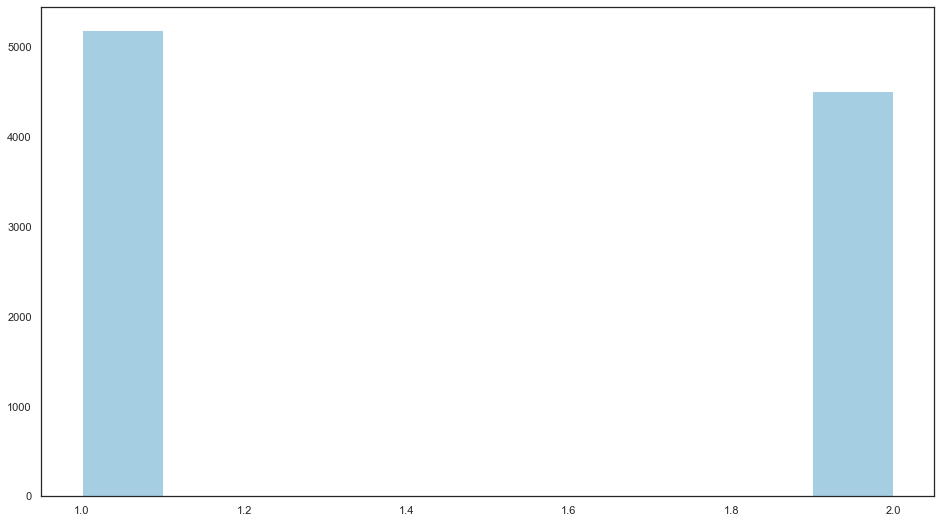

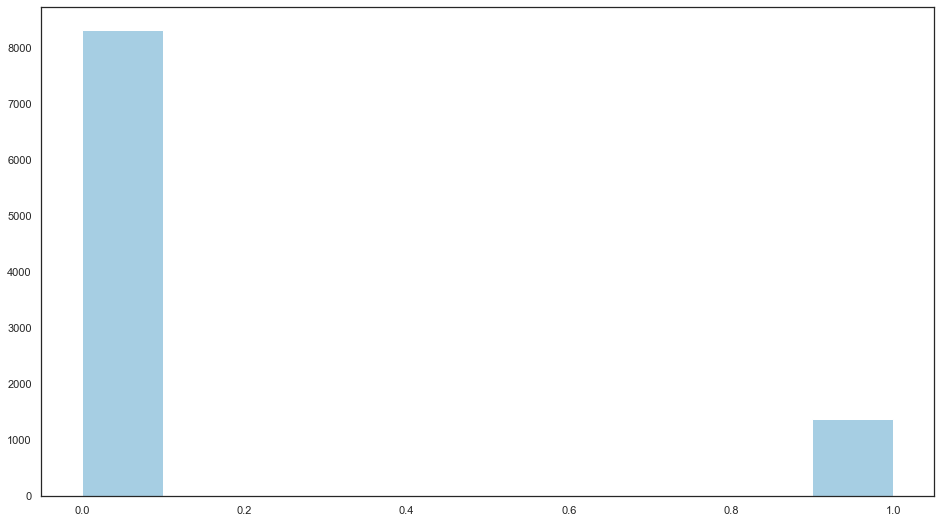

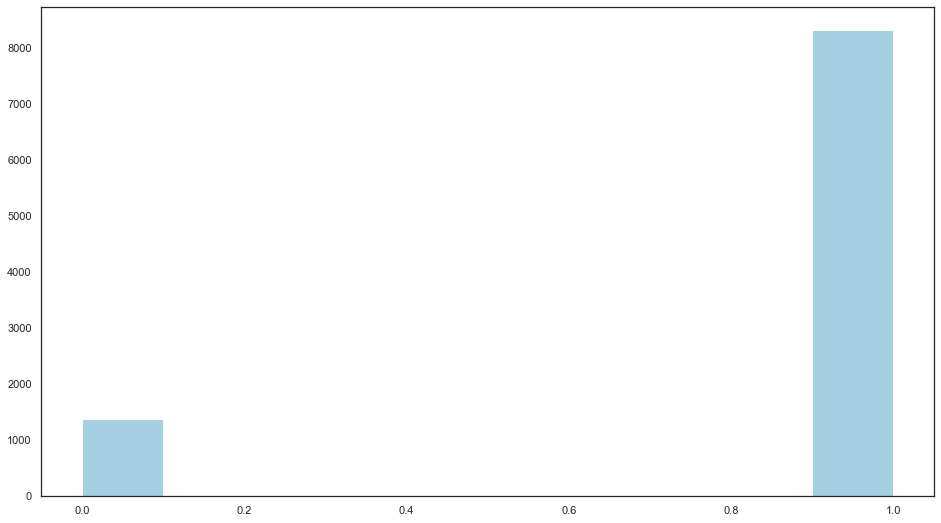

In [104]:
for variable in numerical:
    plt.hist(numerical[variable])
    plt.show()

## Do the distributions for different numerical variables look like a normal distribution?
### Well, not all of them. maybe the months_since_policy_inception and, despite being positively skewed, the months_since_last_claim, but the others don't look like normal distributions.

## For the numerical variables, check the multicollinearity between the features.
### (Please note that we will use the column total_claim_amount later as the target variable.)

### First I will drop some columns

In [105]:
numerical = numerical.drop(['response_rate_y', 'response_rate_n'],axis=1)

### No let's check the multicollinearity between features.
### First on a table, later on a heatmap.

In [106]:
correlations = numerical.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
customer_lifetime_value,1.000000,0.024607,0.398279,0.011239,0.011374,-0.035487,0.021151,0.225460,-0.008388
income,0.024607,1.000000,-0.018288,-0.025976,0.002829,0.006227,-0.011980,-0.358791,0.001454
monthly_premium_auto,0.398279,-0.018288,1.000000,0.004890,0.016636,-0.012744,-0.012722,0.630740,0.009403
months_since_last_claim,0.011239,-0.025976,0.004890,1.000000,-0.041690,0.005354,0.008872,0.007338,-0.020295
months_since_policy_inception,0.011374,0.002829,0.016636,-0.041690,1.000000,-0.001124,-0.015192,-0.001465,0.014407
number_of_open_complaints,-0.035487,0.006227,-0.012744,0.005354,-0.001124,1.000000,0.001451,-0.013775,-0.006150
number_of_policies,0.021151,-0.011980,-0.012722,0.008872,-0.015192,0.001451,1.000000,-0.004575,0.008743
total_claim_amount,0.225460,-0.358791,0.630740,0.007338,-0.001465,-0.013775,-0.004575,1.000000,0.002590
month,-0.008388,0.001454,0.009403,-0.020295,0.014407,-0.006150,0.008743,0.002590,1.000000


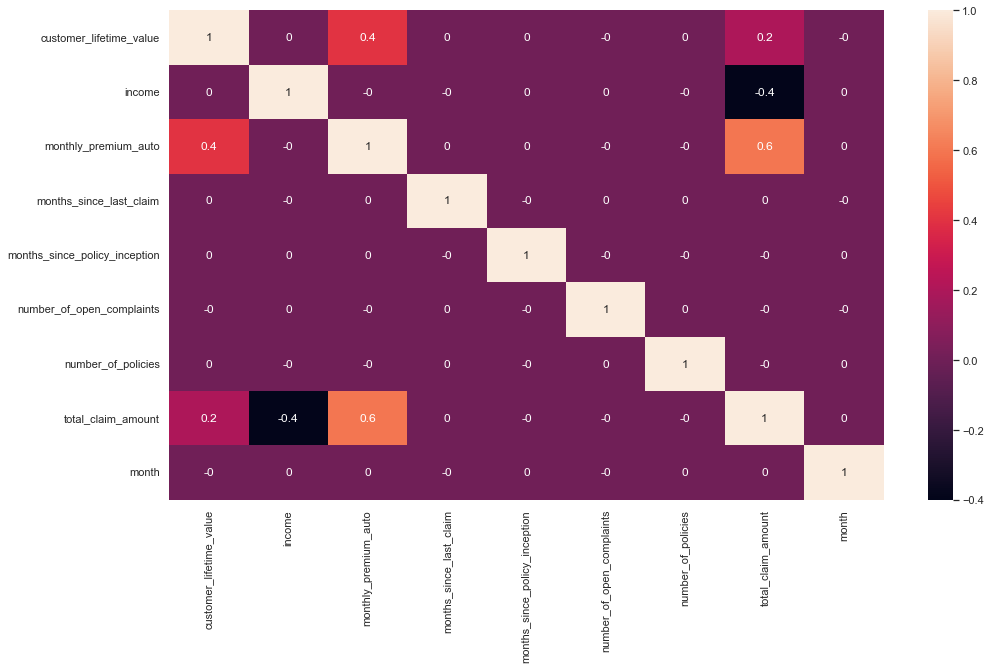

In [107]:
correlations_matrix = numerical.corr().round(1)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## Drop one of the two features that show a high correlation between them (greater than 0.9). 

### there's no correlation > .6 ...

# Lab Round 5

### We already know that our target here, the thing that we want to predict, is the total claim amount.

### Let's start by spliting (X - y SPLIT) into to new dataframes (one of them is actually a series, but nevermind...).
### One of these will represent our target, (y), and the other all the features, (X), that we'll use to predict the target.

## X - y SPLIT

In [108]:
y = hfa['total_claim_amount'] #target, y lowercase
X = hfa.drop('total_claim_amount', axis=1) #features, X uppercase

#### Lets look to our data

In [109]:
X.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,month,response_rate_y,response_rate_n,t_c_a_bins,i_bins
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Offer3,Agent,Four-Door Car,Medsize,M,2,0,1,"(213.0, 302.4]","(44368.0, 68338.0]"
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Offer4,Call Center,Four-Door Car,Medsize,M,1,0,1,"(600.0, 777.8]","(-0.1, 25747.6]"
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Offer3,Call Center,SUV,Medsize,A,2,0,1,"(455.2, 514.5]","(-0.1, 25747.6]"
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Offer2,Branch,Four-Door Car,Medsize,A,1,1,0,"(455.2, 514.5]","(44368.0, 68338.0]"
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Offer1,Branch,Four-Door Car,Medsize,M,1,0,1,"(600.0, 777.8]","(-0.1, 25747.6]"


#### We don't really need the columns 'customer', 'response_rate_y', 'response_rate_n',	't_c_a_bins' or 'i_bins', 'effective_to_date'.
#### Those last, I just created to plot stuff as percentages and in bins...So let's lose them. But I will also drop the 'customer', since it only has unique values that don't really help us making any kind of prediction...
#### I will keep the column "month"... In this particular case, I don't know if it helps, since we only have data for 2 months, but in a full dataset, we could find out some seasonal related stuff... So, I guess it can't really hurts so...but I'm losing the original 'effective_to_date' column.

In [110]:
X=X.drop(columns=['customer', 'response_rate_y', 'response_rate_n', 't_c_a_bins', 'i_bins', 'effective_to_date' ],axis=1)

## Normalize (numerical).

### Let's separate this into categorical and numerical

In [112]:
X_numero = X.select_dtypes(np.number) # We could also use X_numero=X._get_numeric_data()
X_categoria = X.select_dtypes(object) # and, after, X_categoria=X.drop(columns=X_numero.columns)

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_43254/486304635.py:2: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



### Now let's check the shapes:

In [113]:
X.shape

(9688, 23)

In [114]:
X_numero.shape

(9688, 8)

In [115]:
X_categoria.shape

(9688, 15)

#### All good...
### Let's further analyze the numerical data

In [116]:
X_numero.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9688.0,7996.180571,6832.516819,1898.007675,4013.921611,5786.49398,8984.682679,83325.38119
income,9688.0,37551.325764,30357.895578,0.000000,0.000000,33802.50000,62259.000000,99981.00000
monthly_premium_auto,9688.0,93.276012,34.401086,61.000000,68.000000,83.00000,109.000000,298.00000
months_since_last_claim,9688.0,15.099978,9.780979,0.000000,7.000000,15.00000,23.000000,35.00000
months_since_policy_inception,9688.0,48.067506,27.920964,0.000000,24.000000,48.00000,71.000000,99.00000
number_of_open_complaints,9688.0,0.384380,0.883968,0.000000,0.000000,0.00000,0.384256,5.00000
number_of_policies,9688.0,2.975330,2.395177,1.000000,1.000000,2.00000,4.000000,9.00000
month,9688.0,1.465215,0.498814,1.000000,1.000000,1.00000,2.000000,2.00000


### Log10
#### I'm not using log10 now to normalize the data...
#### I'll have to study this later...
#### But I'll leave this here:

In [117]:
# Log10 tranformation: reduce range of 0 - 100000 to a range of 0-5

# Code to test how the transformation will look like.
# Here we are trying two different codes. Notice that in the first function
# we are replacing the -inf values after we take logarithm by 0 while in
# the second case we will replace them with np.NaN. The idea is that
# we will then replace those NaN values in the column with the mean or
# median of the column

#def log_transfom_clean1(x):
#    x = np.log10(x)
#    if np.isfinite(x):
#        return x
#    else:
#        return 0
#
#column_log = data['column'].apply(lambda x :log_transfom_clean1(x))
#sns.displot(column_log)
#plt.show()

#def log_transfom_clean2(x):
#    x = np.log10(x)
#    if np.isfinite(x):
#        return x
#    else:
#        return np.NAN # We are returning NaNs so that we can replace them with means later
#data['column_log'] = list(map(log_transfom_clean2, data['column']))
# Now we replace the NAN by the mean
#data['column_log'] = data['column_log'].fillna(np.mean(data['column_log']))
#sns.displot(data['column_log'])
#plt.show()

### MinMaxScaler

In [118]:
transf_mms = MinMaxScaler().fit(X_numero)
X_nor = transf_mms.transform(X_numero)
print(X_nor.shape)
X_num_minmax = pd.DataFrame(X_nor, columns=X_numero.columns)
X_num_minmax.head()

(9688, 8)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.0
4,0.087527,0.236795,0.236287,0.432831,0.313131,0.076851,0.750,0.0


### StandardScaler

In [120]:
transf_ss = StandardScaler().fit(X_numero)
X_standard = transf_ss.transform(X_numero)
print(X_standard.shape)
X_num_standard = pd.DataFrame(X_standard, columns=X_numero.columns)
X_num_standard.head()

(9688, 8)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,-0.466465,0.345156,-0.938275,-0.828178,0.140851,-0.434858,2.515463,1.072168
1,-0.844192,-1.237018,-0.851064,-1.237157,-0.790397,-0.434858,-0.824754,-0.932689
2,1.017501,-0.507714,0.195469,1.932424,-0.611311,-0.434858,-0.407227,1.072168
3,2.098348,0.379712,0.108258,-0.521445,-1.614193,-0.434858,-0.407227,-0.932689
4,0.150595,-0.457115,0.689665,0.005019,-0.611311,-0.000141,1.680409,-0.932689


### Let's check the difference between scalers:

In [127]:
print(f'Mean difference using standard scaler: ',(X_numero-X_num_standard).mean().mean()) 
print(f'Mean difference using minmax scaler: ', (X_numero-X_num_minmax).mean().mean())

Mean difference using standard scaler:  5702.794893203157
Mean difference using minmax scaler:  5702.507912051109


# Lab Round 6

## One Hot/Label Encoding (categorical).

In [128]:
encoder = OneHotEncoder(drop='first').fit(X_categoria)

cols = encoder.get_feature_names(input_features=X_categoria.columns)

X_categoria_encode = pd.DataFrame(encoder.transform(X_categoria).toarray(),columns=cols)

X_categoria_encode.head()

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Concat DataFrames
### I will use the minmax normalization...

In [130]:
X_1 = pd.concat([X_num_minmax, X_categoria_encode], axis=1) 
X_1.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,state_California,state_Nevada,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
count,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,...,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000
mean,0.074891,0.375585,0.136186,0.431428,0.485530,0.076876,0.246916,0.465215,0.345169,0.096305,...,0.195603,0.145644,0.018064,0.020231,0.196429,0.053778,0.204789,0.703448,0.192093,0.502581
std,0.083909,0.303637,0.145152,0.279457,0.282030,0.176794,0.299397,0.498814,0.475448,0.295024,...,0.396684,0.352767,0.133188,0.140798,0.397317,0.225590,0.403568,0.456761,0.393966,0.500019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025985,0.000000,0.029536,0.200000,0.242424,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.047754,0.338089,0.092827,0.428571,0.484848,0.000000,0.125000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.087031,0.622708,0.202532,0.657143,0.717172,0.076851,0.375000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train-test split.

In [133]:
X_train, X_test, y_train, y_test=tts(X_1, y, test_size=.2)

In [134]:
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model training
y_pred_linreg=linreg.predict(X_test)   # model prediction

## Apply linear regression.

In [141]:
lm = linear_model.LinearRegression()

In [143]:
lm.fit(X_1,y)
print(lm.intercept_)
print(lm.coef_)

-28.798703384846476
[-9.29622410e+00 -2.68532802e+01  1.19773840e+03  9.57068412e+00
 -7.80208033e-01 -8.00553115e+00  4.61075648e+00  5.29803687e-01
  5.81435764e+00  2.94905726e+00 -4.52641730e-01  6.63070522e+00
 -2.56500575e+01 -1.03392719e+01 -5.65285572e+00 -7.05152062e+00
 -1.52638304e+01  1.04474722e+01 -8.98357491e+00 -9.62438358e+00
  1.58049155e+01 -5.72416372e+00  6.52348610e+01  1.50067018e+01
  3.78308348e+02  2.20424562e+02 -6.66003876e+00  6.32555127e+01
  2.21543055e+00  1.59777375e+01 -2.34330792e+00  1.01077314e+00
  4.94718107e+00 -1.25370758e+00 -1.47804293e+00  3.88245945e+01
 -9.12078837e+00 -1.37260686e+01  1.97647844e+01  1.08114445e+01
  8.90477266e+00  1.11169074e+00 -1.35516444e+00  1.27743688e+00
  4.43783362e+01  1.24227785e+01 -9.12911471e+00 -2.13063784e+01
 -4.72354788e-01 -7.65201139e+00  8.28048293e-01 -2.48579852e+00]


## Model Validation
### R2 Score

#### The r2 score varies between 0 and 100%
#### ” …the proportion of the variance in the dependent variable that is predictable from the independent variable(s).”
#### “(total variance explained by model) / total variance.”
#### So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

In [136]:
train_r2 = linreg.score(X_train, y_train)
test_r2 = linreg.score(X_test, y_test)
print (f'Train R2: {train_r2} \nTest R2: {test_r2}')

Train R2: 0.7768604362917693 
Test R2: 0.7503854008684268


### Mean Square Error

#### Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.

In [137]:
train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)
print(f'Train MSE: {train_mse} \nTest MSE: {test_mse}')

Train MSE: 18207.292478326566 
Test MSE: 24594.569841001772


### Root Mean Square Error

#### Root mean squared error (RMSE) is the square root of the mean of the square of all of the error. The use of RMSE is very common, and it is considered an excellent general purpose error metric for numerical predictions.

In [138]:
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)
print(f'Train RMSE: {train_rmse} \nTest RMSE: {test_rmse}')

Train RMSE: 134.93440064833936 
Test RMSE: 156.8265597435644


### Mean Absolute Error

#### The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set.

In [139]:
train_mae=mae(linreg.predict(X_train), y_train)
test_mae=mae(linreg.predict(X_test), y_test)
print(f'Train MAE: {train_mae} \nTest MAE: {test_mae}')

Train MAE: 93.36038370695385 
Test MAE: 102.15445730650195


In [ ]:
# Nevermind the following things...

lm = linear_model.LinearRegression()

lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

let's visualize this result
regression_line = lm.intercept_ + lm.coef_[0]*numerical_2['monthly_premium_auto']
plt.plot(numerical_2['monthly_premium_auto'], regression_line, c = 'blue')
sns.scatterplot(x='monthly_premium_auto',y='total_claim_amount',data=numerical_2)
plt.show()

print("R2-score is ", lm.score(X,y))

y_pred = lm.predict(X)
print("mean squared error (MSE) is ",mean_squared_error(y_pred,y))
np.sqrt(mean_squared_error(y_pred,y)) #squared root of the mean squared error  RMSE - ROOT of MSE


regression_line = lm.intercept_ + lm.coef_[0]*numerical_2['monthly_premium_auto']
plt.plot(numerical_2['monthly_premium_auto'], regression_line, c = 'yellow')
regression_line_2 = lm.intercept_ + 0.8*numerical_2['monthly_premium_auto']
plt.plot(numerical_2['monthly_premium_auto'], regression_line_2, c = 'red')
regression_line_3 = 10 + lm.coef_[0]*numerical_2['monthly_premium_auto']
plt.plot(numerical_2['monthly_premium_auto'], regression_line_3, c = 'green')
sns.scatterplot(x='monthly_premium_auto',y='total_claim_amount',data=numerical_2)
plt.show()

print("MSE fitted line(YELLOW) is ", round(mean_squared_error(regression_line, y),2))
print("MSE line 2(RED) is      ", round(mean_squared_error(regression_line_2, y),2))
print("MSE line 3(GREEN) is      ", round(mean_squared_error(regression_line_3, y),2))

#no other line would be better, the normal one, yellow has the lowest mse

# Normalize !

from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different 
from sklearn.preprocessing import StandardScaler

numerical_2.describe().T

# WITH LOG

def log_transfom(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

numerical_2['monthly_premium_auto_log'] = list(map(log_transfom, numerical_2['monthly_premium_auto']))
# Now we replace the NAN by the mean
numerical_2['monthly_premium_auto_log'] = numerical_2['monthly_premium_auto_log'].fillna(np.mean(numerical_2['monthly_premium_auto_log']))
sns.displot(numerical_2['monthly_premium_auto_log'])
plt.show()

iqr = np.percentile(numerical_2['monthly_premium_auto_log'],75) - np.percentile(numerical_2['monthly_premium_auto_log'],25)
upper_limit = np.percentile(numerical_2['monthly_premium_auto_log'],75) + 3*iqr
lower_limit = np.percentile(numerical_2['monthly_premium_auto_log'],25) - 3*iqr
numerical_2 = numerical_2[(numerical_2['monthly_premium_auto_log']>lower_limit) & (numerical_2['monthly_premium_auto_log']<upper_limit)]
sns.displot(numerical_2['monthly_premium_auto_log'])
plt.show()

# MINMAX & STANDARD

sns.displot(numerical['total_claim_amount'])
plt.show()

sns.displot(numerical['monthly_premium_auto'])
plt.show()

y = numerical_2['total_claim_amount']
X = numerical_2.drop(['total_claim_amount'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

transformer = MinMaxScaler().fit(X_num)
x_nor = transformer.transform(X_num)
print(x_nor.shape)
x_nor
mmscaler = pd.DataFrame(x_nor, columns=X_num.columns)


sns.displot(mmscaler.monthly_premium_auto)
plt.show()

transformer = StandardScaler().fit(X_num)
x_standard = transformer.transform(X_num)
print(x_standard.shape)
stand = pd.DataFrame(x_standard, columns=X_num.columns)

sns.displot(stand.monthly_premium_auto)
plt.show()